<a href="https://colab.research.google.com/github/wahyusyahputraaaa/DataMining/blob/main/Praktikum_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
# Importing and Exporting Data
df = pd.read_csv('/content/drive/MyDrive/500_Person_Gender_Height_Weight_Index.csv')
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [ ]:
df['Height'].mean()

169.944

In [ ]:
df['Height'].median()

170.5

In [ ]:
df['Height'].mode()

,Height
0,188


In [ ]:
# Hitung kuartil pertama (Q1)
q1 = df['Height'].quantile(0.25)
print("Q1 : ", q1)
# Hitung kuartil ketiga (Q3)
q3 = df['Height'].quantile(0.75)
print("Q3 : ", q3)
iqr = q3 - q1
print("IQR : ", iqr)

Q1 :  156.0
Q3 :  184.0
IQR :  28.0


<Axes: >

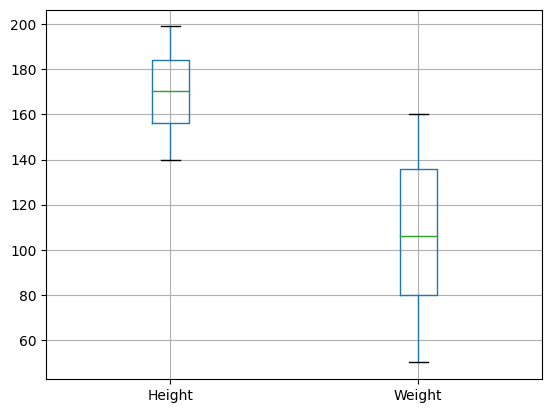

In [ ]:
df.boxplot(column=['Height', 'Weight'])

In [ ]:
outlier_data = {
    'Gender' : ["Male", "Female", "Female", "Male"],
    'Height' : [51, 155, 45, 160],
    'Weight' : [33, 320, 30, 335],
    'Indexs' : [2, 5, 2, 5]
}

outlier_df =pd.DataFrame(outlier_data)

df = pd.concat([df, outlier_df], ignore_index=True)
df

,Gender,Height,Weight,Index,Indexs
0,Male,174,96,4.0,NaN
1,Male,189,87,2.0,NaN
2,Female,185,110,4.0,NaN
3,Female,195,104,3.0,NaN
4,Male,149,61,3.0,NaN
...,...,...,...,...,...
499,Male,173,131,5.0,NaN
500,Male,51,33,NaN,2.0
501,Female,155,320,NaN,5.0
502,Female,45,30,NaN,2.0


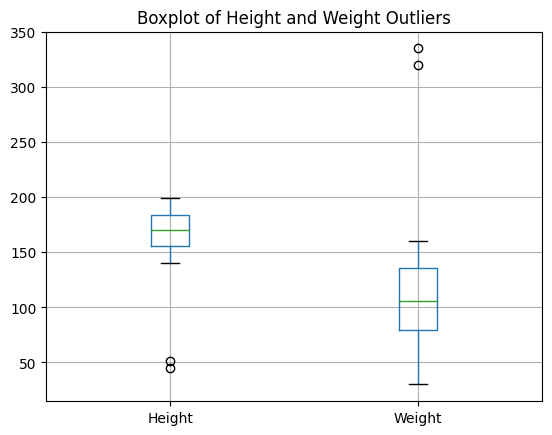

In [ ]:
import matplotlib.pyplot as plt

# Membuat boxplot untuk kolom Height dan Weight
df.boxplot(column=['Height', 'Weight'])
plt.title('Boxplot of Height and Weight Outliers')
plt.show()

In [ ]:
# Hitung kuartil pertama (Q1)
q1 = df['Height'].quantile(0.25)
print("Q1 : ", q1)
# Hitung kuartil ketiga (Q3)
q3 = df['Height'].quantile(0.75)
print("Q3 : ", q3)
iqr = q3 - q1
# Hitung batas bawah (Lower Bound) dan batas atas (Upper Bound) untuk outlier
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Temukan outlier dalam DataFrame
outliers = df[(df['Height'] < lower_bound) | (df['Height'] > upper_bound)]

print("Outliers:")
print(outliers)

Q1 :  156.0
Q3 :  184.0
Outliers:
     Gender  Height  Weight  Index  Indexs
500    Male      51      33    NaN     2.0
502  Female      45      30    NaN     2.0


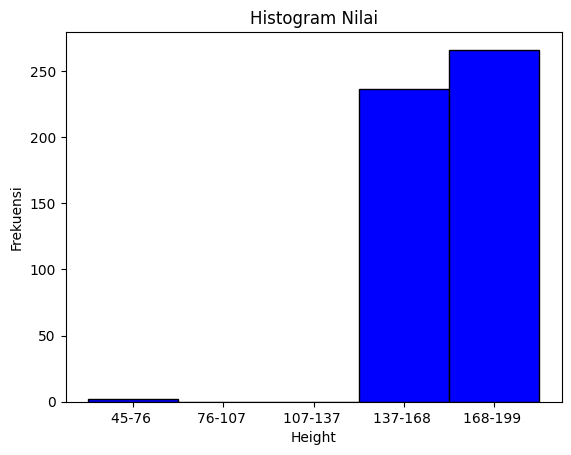

In [ ]:
data_height = df["Height"]
# Buat histogram
n, bins, patches = plt.hist(data_height, bins=5, color='blue', edgecolor='black')

# Tambahkan Label
plt.title('Histogram Nilai')
plt.xlabel('Height')
plt.ylabel('Frekuensi')

# Tampilkan rentang frekuensi di sumbu x
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, ['{:.0f}-{:.0f} ' .format(bins[i], bins[i+1]) for i in range(len(bins)-1)])

# Tampilkan histogram
plt.show()

In [ ]:
# Mengidentifikasi baris outlier berdasarkan ciri-ciri yang unik

outliers_condition = ((df['Height'] > upper_bound) | (df['Height'] < lower_bound)) | (df['Weight'] < 30) | (df['Weight'] > 200)

# Drop baris yang memenuhi kondisi di atas (outliers)
df_cleaned = df[~outliers_condition]  # Tanda ~ untuk negasi (tidak termasuk kondisi outlier)

# Menampilkan data setelah penghapusan outliers
print(df_cleaned.tail())

     Gender  Height  Weight  Index  Indexs
495  Female     150     153    5.0     NaN
496  Female     184     121    4.0     NaN
497  Female     141     136    5.0     NaN
498    Male     150      95    5.0     NaN
499    Male     173     131    5.0     NaN


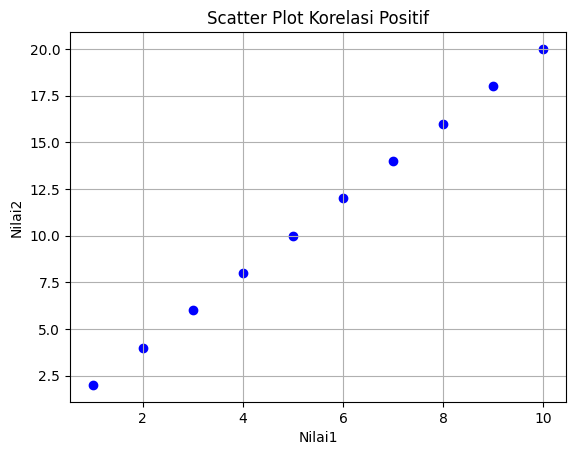

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Buat DataFrame contoh
data = {'Nilail': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Nilai2': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}

df = pd.DataFrame(data)

# Buat scatter plot
plt.scatter(df['Nilail'], df['Nilai2'], color='blue', marker='o')

# Tambahkan Label
plt.title('Scatter Plot Korelasi Positif')
plt.xlabel('Nilai1')
plt.ylabel('Nilai2')

# Tampilkan plot
plt.grid(True)
plt.show()

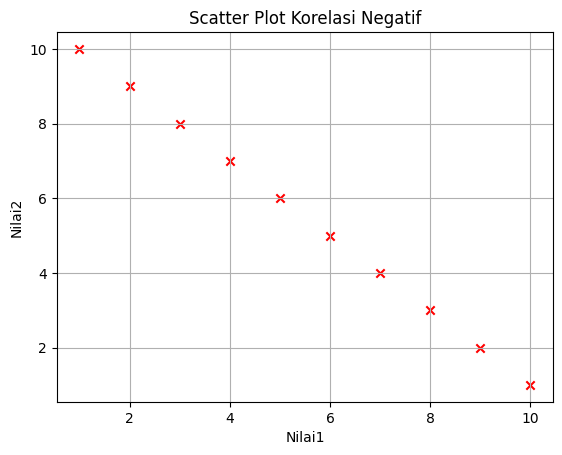

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Buat DataFrame contoh
data = {'Nilail': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Nilai2': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]}

df = pd.DataFrame(data)

# Buat scatter plot
plt.scatter(df['Nilail'], df['Nilai2'], color='red', marker='x')

# Tambahkan Label
plt.title('Scatter Plot Korelasi Negatif')
plt.xlabel('Nilai1')
plt.ylabel('Nilai2')

# Tampilkan plot
plt.grid(True)
plt.show()